# CPSC 483 - Machine Learning - Spring 2019
## Project 3 May 16 2019
## Viet Le


In [1]:
import pandas
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# bank.csv from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pandas.read_csv('../bank.csv', sep=';')

# Ordinal features
#
# Note: month probably shouldn't be ordinal.
# Then again, neither should day.

boolean = { 'no': 0.0, 'yes': 1.0 }
months = {
    'jan': 1.0, 'feb': 2.0, 'mar': 3.0, 'apr': 4.0,  'may': 5.0,  'jun': 6.0,
    'jul': 7.0, 'aug': 8.0, 'sep': 9.0, 'oct': 10.0, 'nov': 11.0, 'dec': 12.0
}

bank.replace({
    'default': boolean,
    'housing': boolean,
    'loan':    boolean,
    'month':   months,
    'y':       boolean
}, inplace=True)

# Categorical features
#
# Since we plan to use logistic regression, add drop_first=True
# to use dummy instead of one-hot encoding

categorical = ['job', 'marital', 'education', 'contact', 'poutcome']
bank = pandas.get_dummies(bank, columns=categorical, prefix=categorical, drop_first=True)

# Numeric features
#
# Standardized because we plan to use KNN and SVM 

scaled = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
bank[scaled] = sklearn.preprocessing.scale(bank[scaled].astype(float))

# Training set and targets

X = bank.drop(columns='y').values
t = bank['y'].values


In [2]:
# Exeperiment 1: Splitting the dataset
Xtrain, Xtest, ttrain, ttest = train_test_split(X, t, test_size = 0.2)

In [3]:
# Experiment 2: Fitting a Gaussian model
clf = GaussianNB()
clf.fit(Xtrain, ttrain)

GaussianNB(priors=None, var_smoothing=1e-09)

Score: 0.8375690607734807
Confusion Matrix:
 [[696  55]
 [ 92  62]]
AUC score: 0.8044275239706712


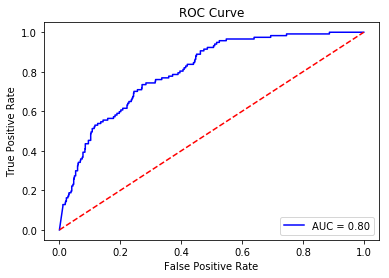

In [4]:
# Experiment 3: Predict using the Gaussian model
pred = clf.predict(Xtest)
score = clf.score(Xtest, ttest)
print("Score:", score)
conf_matrix = confusion_matrix(pred, ttest)
print("Confusion Matrix:\n", conf_matrix)

predictProb_y = clf.predict_proba(Xtest)[:,1]
fps, tps, thresholds = roc_curve(ttest, predictProb_y)
roc_auc = auc(fps, tps)
roc_score = roc_auc_score(ttest, predictProb_y)
print("AUC score:", roc_auc)

plt.title('ROC Curve')
plt.plot(fps, tps, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Score: 0.9005524861878453
Confusion Matrix:
 [[774  76]
 [ 14  41]]
AUC score: 0.8888997353464358


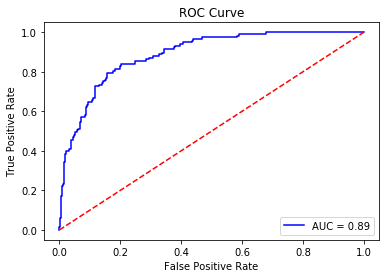

In [5]:
# Experiment 4 = Fitting Logistic Regression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', fit_intercept = False)
clf.fit(Xtrain, ttrain)

pred = clf.predict(Xtest)
score = clf.score(Xtest, ttest)
print("Score:", score)
conf_matrix = confusion_matrix(pred, ttest)
print("Confusion Matrix:\n", conf_matrix)

predictProb_y = clf.predict_proba(Xtest)[:,1]
fps, tps, thresholds = roc_curve(ttest, predictProb_y)
roc_auc = auc(fps, tps)
roc_score = roc_auc_score(ttest, predictProb_y)
print("AUC score:", roc_auc)

plt.title('ROC Curve')
plt.plot(fps, tps, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Fitting  linear
Score: 0.8773480662983425
Confusion Matrix:
 [[780 103]
 [  8  14]]
AUC: 0.743481279014274


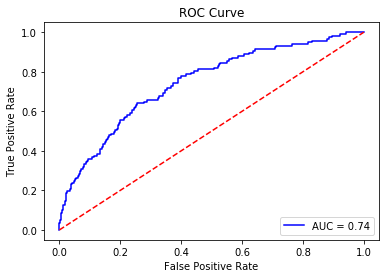

Fitting  poly


/srv/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score: 0.8718232044198895
Confusion Matrix:
 [[783 111]
 [  5   6]]
AUC: 0.8402642197058442


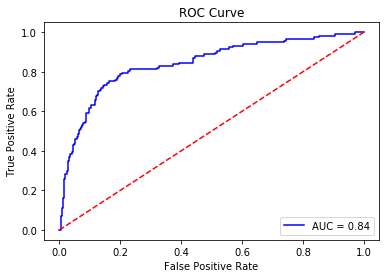

Fitting  rbf


/srv/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score: 0.8795580110497238
Confusion Matrix:
 [[778  99]
 [ 10  18]]
AUC: 0.8814427957828973


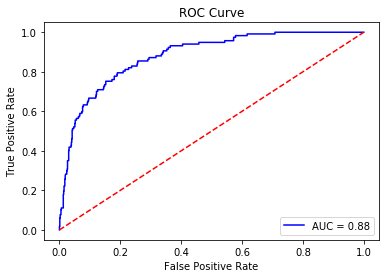

Fitting  sigmoid


/srv/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score: 0.8662983425414365
Confusion Matrix:
 [[755  88]
 [ 33  29]]
AUC: 0.6996832834396286


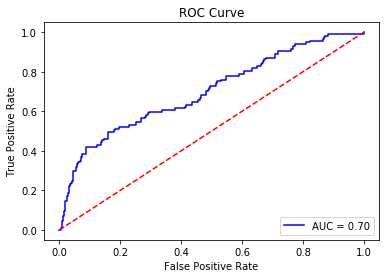

The best type (highest AUC): rbf
With AUC: 0.8814427957828973


In [18]:
# Experiment 5 -Fitting SVC linear, poly, rbf, sigmoid
best_auc = 0
for type in ['linear', 'poly', 'rbf', 'sigmoid']:
    print("Fitting ", type)
    clf = SVC(kernel = type, probability = True)
    clf.fit(Xtrain, ttrain)
    clf.score(Xtest, ttest)

    pred = clf.predict(Xtest)
    score = clf.score(Xtest, ttest)
    print("Score:", score)
    conf_matrix = confusion_matrix(pred, ttest)
    print("Confusion Matrix:\n", conf_matrix)

    predictProb_y = clf.predict_proba(Xtest)[:,1]
    fps, tps, thresholds = roc_curve(ttest, predictProb_y)
    roc_auc = auc(fps, tps)
    roc_score = roc_auc_score(ttest, predictProb_y)
    print("AUC:", roc_auc)
    
    if (roc_auc > best_auc):
        best_auc = roc_auc
        best_type = type
        
    plt.title('ROC Curve')
    plt.plot(fps, tps, 'b', label= 'AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

print("The best type (highest AUC):", best_type)
print("With AUC:", best_auc)

In [7]:
# Experiment 6 - In Experiments 2-5, which had the best performance?
# The best performance belongs to the one with the highest AUC
# Logistic regression had the highest AUC

In [8]:
# Experiment 7 - What if we just predict 0 for training set
conf_matrix = confusion_matrix(ttrain, ttrain)
print("Number of 0 values:", conf_matrix[0][0])
print("Number of 1 values:", conf_matrix[1][1])
total = conf_matrix[0][0] + conf_matrix[1][1]
accuracy = conf_matrix[0][0] / total
accuracy = accuracy * 100
print("Accuracy: %0.2f" % accuracy, "%")

Number of 0 values: 3212
Number of 1 values: 404
Accuracy: 88.83 %


In [19]:
# Testing set vs predicting all 0
pred_0 = []
for i in range(len(ttest)):
    pred_0.append(0)
conf_matrix = confusion_matrix(ttest, pred_0)
print("Confusion Matrix:\n", conf_matrix)
predictProb_y = clf.predict_proba(Xtest)[:,0]
fps, tps, thresholds = roc_curve(ttest, predictProb_y)
roc_auc = auc(fps, tps)
print("AUC:", roc_auc)
# With such an awful AUC value, predicting all 0's is awful

Confusion Matrix:
 [[788   0]
 [117   0]]
AUC: 0.3003167165603714
